# Fase 4 - Insights dos Dados (Self)

## Importação das bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
MODELED = '../modeled/'

## Leitura dos arquivos Parquet contendo os gastos - DataFrame Panda

In [3]:
all_data = pd.read_parquet(MODELED+"parquet/sumario/")

## Função para inserção do valor como label em gráficos de barra

In [4]:
def show_values_on_bars(axs, h_v="v", paint="black", font=8, space=0.4):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                ax.text(_x, _y, "{:10,.0f}".format(p.get_width()).replace(",","."), ha="center", color=paint, fontsize=font) 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() / 2
                value = int(p.get_width())
                ax.text(_x, _y, "{:10,.0f}".format(p.get_width()).replace(",","."), ha="left", color=paint, fontsize=font)

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

## Função para cálculo de porcentagem

In [5]:
def percent(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n{:,.0f}".format(pct, absolute).replace(",",".")

## Geração de novo DataFrame numa estrutura Pivot

In [6]:
func = lambda x: round(x.sum()/1000,0)
df = pd.pivot_table(all_data, index=['partido'], columns=['ano'], aggfunc=func, fill_value=0)

In [7]:
df

valor                           
ano             2015   2016   2017   2018  2019
partido                                        
AVANTE          2204   2495   2919   2534   741
CIDADANIA          0      0      0      0   824
DEM            16194  16223  18077  17730  4497
MDB            22278  24798  22846  21728  6043
NOVO               0      0      0      0   289
PATRI           2029   1997   2023   2013   162
PATRIOTA           0      0      0      0   594
PCdoB           5607   5462   6160   4895  1437
PDT             8652   8790   9344   8808  4395
PHS             1450   1679   1928   1876   230
PL                 1      0      0      0  5077
PMDB            1572      0      0      0     0
PMN               85      0      0      0    90
PODE            6428   7678   8398   7539  1848
PP             22375  23811  23342  20825  6558
PP**             967      0      0      0     0
PPL              403    480    470    474    45
PPS             3491   3334   3803   3437   219
PR             16351  17151  16057  15927  1221
PRB             8325   9141   9531   8976  4586
PROS            4037   4150   4526   4760  1630
PRP              117      0      0      0     0
PRTB               0    167      0      0     0
PSB            10378  11078  12217  11394  4258
PSC             2404   2464   3500   3385  1184
PSD            14530  14905  15750  15686  5640
PSDB           19845  20393  19843  18857  5164
PSL             2591   2811   3004   2765  5197
PSOL            2096   2042   2165   1991  1260
PT             24526  24917  25860  26188  9526
PTB             7844   8011   7221   7334  1904
PTdoB             40      0      0      0     0
PV              1761   1358   1234   1093   365
REDE             592    666    714    666    93
S.PART.            0      0      0      0    96
SD               513      0      0      0     0
SOLIDARIEDADE   3916   4379   4198   3832  2018

In [8]:
anos = [i[1] for i in list(df.columns.values)]

## Geração de Gráfico de Calor dos Gastos Anuais por Partido

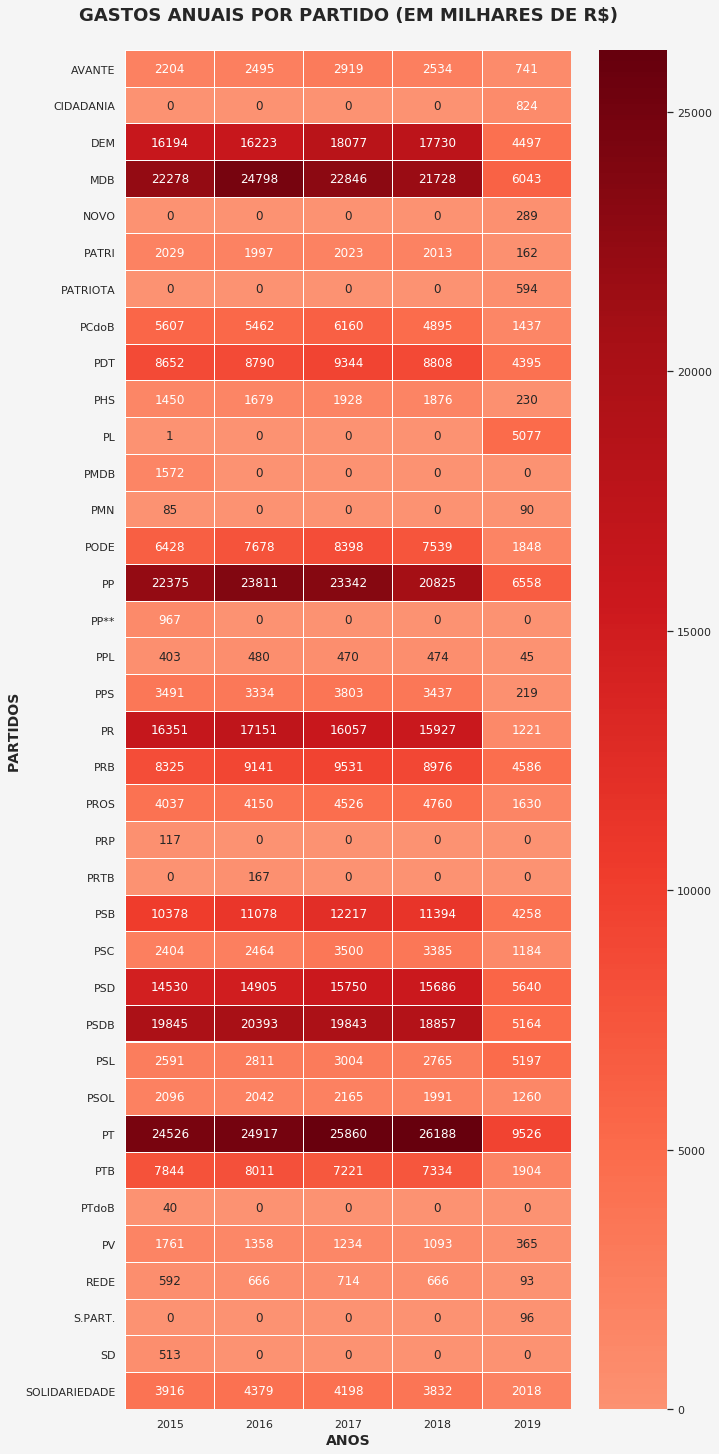

In [9]:
sns.set(font_scale=1)
plt.figure(figsize=(10, 25), facecolor='WhiteSmoke')
sns.heatmap(df, annot=True, linewidth=.05, cmap="Reds", center=df.mean().mean(), xticklabels=anos, vmin=df.min().min(), vmax=df.max().max(), fmt='.0f')
plt.xlabel('ANOS', fontsize=14,fontweight="bold")
plt.ylabel('PARTIDOS', fontsize=14,fontweight="bold")
plt.title('GASTOS ANUAIS POR PARTIDO (EM MILHARES DE R$)',fontsize=18,fontweight="bold",pad=30)
plt.show()

## Ano Base para Geração dos Próximos Gráficos

In [10]:
ano = '2017'

## Geração de DataFrame e Gráfico com Top 5 de Deputados Gastadores

In [11]:
dfAux = all_data[all_data.ano==ano].groupby(['ano','parlamentar','partido','uf']).sum().reset_index()
dfTop = dfAux.sort_values('valor',ascending=False).head(10)
dfTop['politico'] = dfTop['parlamentar']+' - '+dfTop['partido']+'/'+dfTop['uf'] 

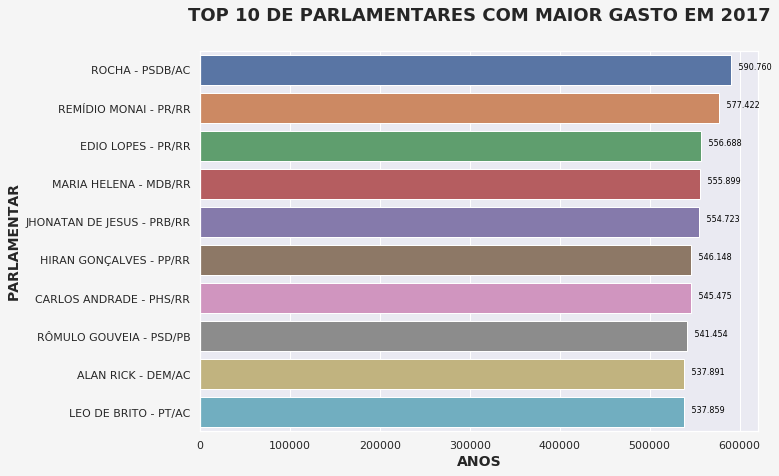

In [12]:
sns.set(font_scale=1)
plt.figure(figsize=(10, 7), facecolor='WhiteSmoke')
aux = sns.barplot(x="valor", y="politico", data=dfTop)
plt.xlabel('ANOS', fontsize=14,fontweight="bold")
plt.ylabel('PARLAMENTAR', fontsize=14,fontweight="bold")
plt.title('TOP 10 DE PARLAMENTARES COM MAIOR GASTO EM '+ano,fontsize=18,fontweight="bold",pad=30)
show_values_on_bars(aux, "h")
plt.show()

## Geração de DataFrame e Gráfico com Gastos por Categoria

In [13]:
dfCat = all_data[all_data.ano==ano].groupby(['categoria']).sum().reset_index().sort_values('valor', ascending = False)
dfCat['categoria'] = dfCat['categoria'].str.upper() 

In [14]:
dfAux = dfCat[:7].copy()
dfOutros = pd.DataFrame(data = {
    'categoria' : ['OUTROS'],
    'valor' : [dfCat['valor'][7:].sum()]
})
dfCat = pd.concat([dfAux, dfOutros])
dfCat

,categoria,valor
3,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,5.779436e+07
4,EMISSÃO BILHETE AÉREO,5.295769e+07
9,LOCAÇÃO OU FRETAMENTO DE VEÍCULOS AUTOMOTORES,2.784564e+07
10,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,2.373050e+07
2,"CONSULTORIAS, PESQUISAS E TRABALHOS TÉCNICOS.",1.938438e+07
1,COMBUSTÍVEIS E LUBRIFICANTES.,1.845095e+07
17,TELEFONIA,9.916618e+06
0,OUTROS,1.579530e+07


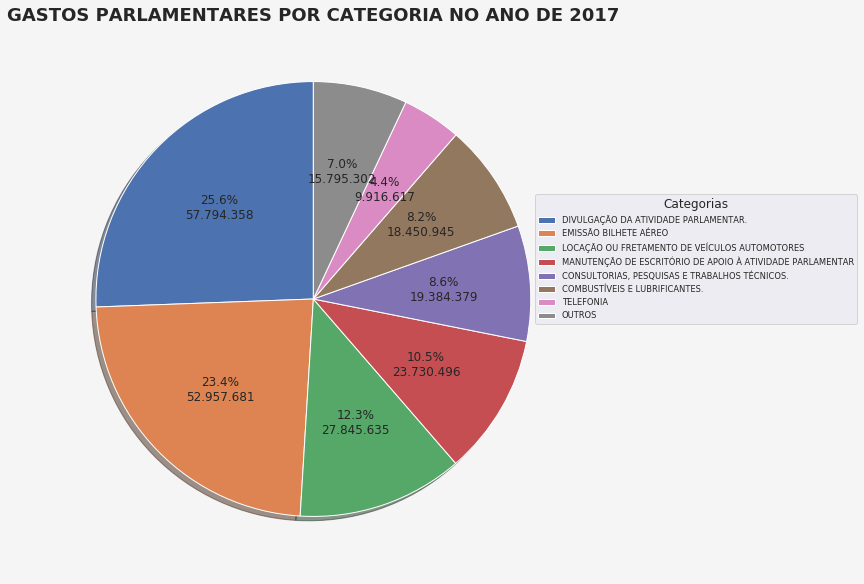

In [15]:
plt.figure(figsize=(12, 10), facecolor='WhiteSmoke')
aux = plt.pie(dfCat['valor'], autopct=lambda pct: percent(pct, dfCat['valor']), shadow=True, startangle=90)
plt.title('GASTOS PARLAMENTARES POR CATEGORIA NO ANO DE '+ano,fontsize=18,fontweight="bold")
#plt.legend(dfCat['categoria'],title="Categorias",loc='best', bbox_to_anchor=(0.9, 0))
plt.legend(dfCat['categoria'],title="Categorias",bbox_to_anchor=(0.9,0.7),fontsize='x-small')
plt.show()